In [4]:
import pickle
import numpy as np
L=1e-3
Nx=2048
x = np.linspace(0.0, L, Nx)
with open("bte_1d.pkl", "rb") as f:
    ts, Tsnaps = pickle.load(f)
if False:#try:
    import matplotlib.pyplot as plt
    import matplotlib as mpl
    mpl.rcParams.update({"figure.figsize": (7, 4)})
    for Ts in Tsnaps:#[np.array([1,6,-1])]:
        plt.plot(x * 1e6, Ts.T)#, label="?(x, t_final)")
    plt.xlabel("x [m]")
    #plt.ylabel("temperature perturbation ? [K]")
    plt.title("1D Inventory from Upwind BTE")
    #plt.legend()
    plt.tight_layout()
    plt.xlim(0,1000)
    plt.ylim(0,1e8)
    plt.savefig('bte_temps.png')
    plt.show()


In [5]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
L=1e-3
Nx=2048
x = np.linspace(0.0, L, Nx)
with open("bte_1d.pkl", "rb") as f:
    ts, Tsnaps = pickle.load(f)
if False:#try:
    import matplotlib.pyplot as plt
    import matplotlib as mpl
    mpl.rcParams.update({"figure.figsize": (7, 4)})
    for Ts in Tsnaps:#[np.array([1,6,-1])]:
        plt.plot(x * 1e6, Ts.T)#, label="?(x, t_final)")
    plt.xlabel("x [m]")
    #plt.ylabel("temperature perturbation ? [K]")
    plt.title("1D Inventory from Upwind BTE")
    #plt.legend()
    plt.tight_layout()
    plt.xlim(0,1000)
    plt.ylim(0,1e8)
    plt.savefig('bte_temps.png')
    plt.show()


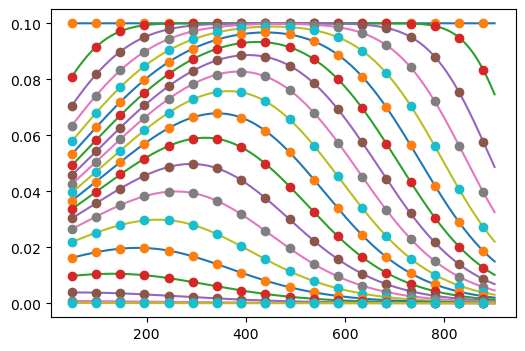

20


<Figure size 640x480 with 0 Axes>

In [6]:

from numpy.linalg import svd,eig
fig, axs = plt.subplots(figsize=(6,4))
def decompose_field(x,T):
    from numpy.polynomial.legendre import legvander,legval
    # Rescale coordinates to [-1, 1]
    x_scaled = 2 * (x - x.min()) / (x.max() - x.min()) - 1
    
    # Get Vandermonde matrix (evaluated basis)
    deg_x = 12
    V = legvander(x_scaled, deg_x)  # shape: (N_points)
    
    # Project via inner product (or least-squares)
    # Result is vector of length (deg_x + 1)*(deg_y + 1)
    # Project T_flat onto the Legendre basis
    G = V.T @ V           # Gram matrix
    #print(V.shape,T.shape)
    b = V.T @ T           # Unnormalized projection
    c = np.linalg.solve(G, b)  # Solve for coefficients
    return c
def interp_temp(x,c):
    from numpy.polynomial.legendre import legval
    return legval(x, c,tensor=False) #np.sin(np.pi * x / Lx)  # W/m²
scale = lambda x: 2 * (x - x.min()) / (x.max() - x.min()) - 1
G = []
time_slice = np.linspace(1,13646,20,dtype=int)
ts_short = ts[time_slice]
Tshort = Tsnaps[time_slice]
for Ts in Tshort:
    c=decompose_field(x[100:1848],Ts.T[100:1848]*1e-9)
    G.append(c[:,0])
    T = interp_temp(scale(x[100:1848]),c)
    if True:
        plt.plot(x[100:1848] * 1e6,T)
        plt.plot(x[100:1848] * 1e6,Ts.T[100:1848]*1e-9,'o',markevery=100)
if True:
    plt.show()
#print(np.array(G))
#fig, axs = plt.subplots(9,5,figsize=(8,12))
Gt = []
print(len(G))
cmp=11
for i in range(len(G)-11):
    Gt.append(G[i:11+i])
    X = np.array(G[i:11+i])
    Y = np.array(G[i+1:12+i])
    #print(X.shape,Y.shape)
    u,s,v = svd(X,full_matrices=False)
    #print(s)
    #print(Y.shape,v.T[:,0:cmp].shape,u.T[0:cmp,:].shape)
    sinv = 1./s
    A = Y@v.T@np.diag(sinv)@u.T
    Ac = Y@v.T[:,0:cmp]@np.diag(sinv[0:cmp])@u.T[0:cmp,:]
    Lam,Xi = eig(A)
    Lam = np.diag(np.abs(Lam))
    if False:
        #for ax,M in zip(axs[i,:],[u[:,0:cmp],np.diag(s[0:cmp]),v[0:cmp,:],A,Ac]):#,Lam,Xi.real,Xi.imag]):#[0,:]):
        for ax,M in zip(axs[i,:],[A,Ac,Lam,Xi.real,Xi.imag]):#[0,:]):
            im = ax.imshow(M, cmap='hot', vmin=-.2,vmax=.2,
                   origin='upper', interpolation='nearest', aspect='equal')
if False:
    plt.xlim(0,1000)
    plt.ylim(0,1e-1)
    plt.show()
#fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
#plt.title(f'Green\'s Function after {Nt} steps')
#plt.xlabel('x (m)')
#plt.ylabel('y (m)')
plt.tight_layout()
#plt.savefig('matrix_evolution.png')
plt.show()



In [7]:
G = []
time_slice = np.linspace(0,13648,13647,dtype=int)
#ts_short = ts[time_slice]
Tshort = Tsnaps#[time_slice]
for Ts in Tshort:
    c=decompose_field(x[100:1848],Ts.T[100:1848]*1e-9)
    G.append(c[:,0])
    T = interp_temp(scale(x[100:1848]),c)
    if False:
        plt.plot(x[100:1848] * 1e6,T)
        plt.plot(x[100:1848] * 1e6,Ts.T[100:1848]*1e-9,'o',markevery=100)
if False:
    plt.show()


13647


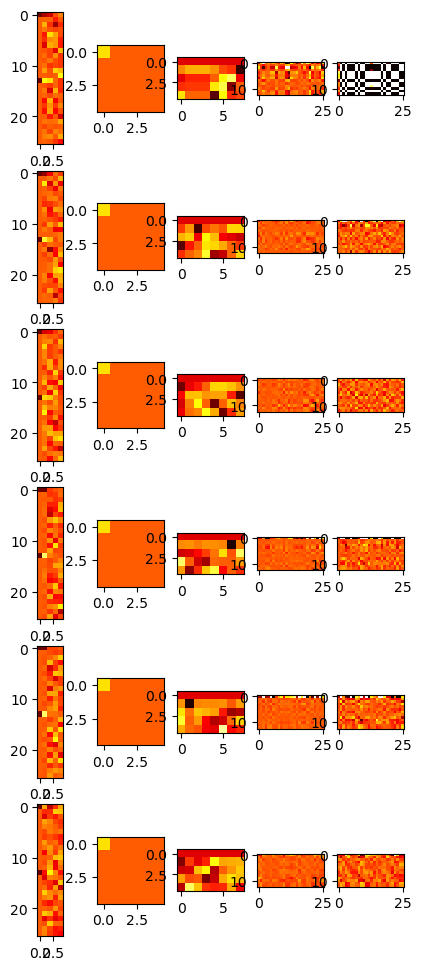

6


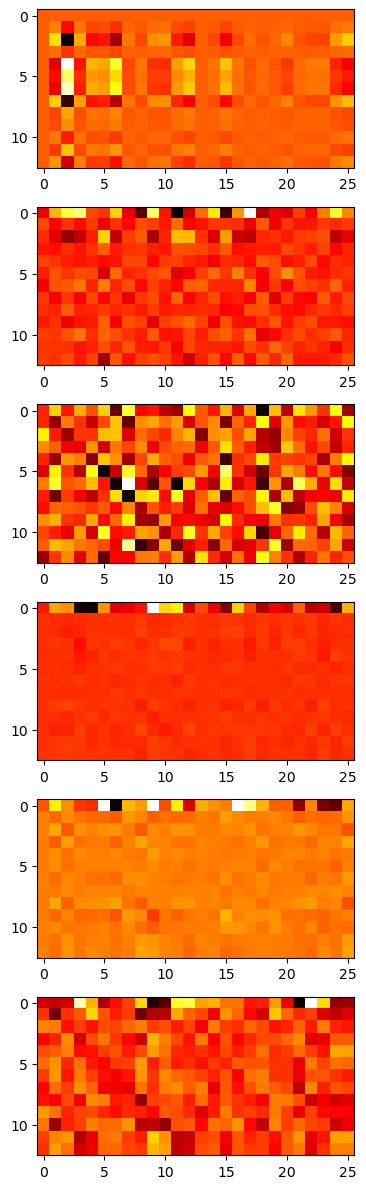

In [8]:
#print(np.array(G))
nA = 6
nM = 5
fig, axs = plt.subplots(nA,nM,figsize=(nM,2*nA))
Gt = []
lAc = []
print(len(G))
cmp=5
#for i in range(0,len(G)-11,1):
strt = 1
major_stride = 10
minor_stride = 2
npts = 8
for i,ax in enumerate(axs):
    #Gt.append(G[i:11+i])
    X0 = np.array(G[strt+i*major_stride  :strt+i*major_stride+npts*minor_stride  :minor_stride]).T
    X1 = np.array(G[strt+i*major_stride+minor_stride  :strt+i*major_stride+npts*minor_stride+minor_stride  :minor_stride]).T
    #print(X0.shape,X1.shape)
    X  = np.concatenate((X1,X0),axis=0)
    Y  = np.array(G[strt+i*major_stride+2*minor_stride:strt+i*major_stride+npts*minor_stride+2*minor_stride:minor_stride]).T-\
        np.array(G[strt+i*major_stride+minor_stride:strt+i*major_stride+npts*minor_stride+minor_stride:minor_stride]).T
    #print(X.shape,Y.shape)
    u,s,v = svd(X,full_matrices=False)
    #print(s)
    #print(u.shape,v.shape)
    x_deg = u.shape[0]//2
    #print(Y.shape,v.T[:,0:cmp].shape,u.T[0:cmp,:].shape)
    sinv = 1./s
    A = Y@v.T@np.diag(sinv)@u.T
    Ac = Y@v.T[:,0:cmp]@np.diag(sinv[0:cmp])@u.T[0:cmp,:]
    #print(A[:,0:x_deg].shape)
    '''Anorm1 = np.linalg.norm(A[:,0:x_deg],ord=2)
    norm_comm1 = np.linalg.norm(A[:,0:x_deg] @ A[:,0:x_deg].conj().T - A[:,0:x_deg].conj().T @ A[:,0:x_deg], ord=2)
    Anorm0 = np.linalg.norm(A[:,x_deg:2*x_deg],ord=2)
    norm_comm0 = np.linalg.norm(A[:,x_deg:2*x_deg] @ A[:,x_deg:2*x_deg].conj().T - A[:,x_deg:2*x_deg].conj().T @ A[:,x_deg:2*x_deg], ord=2)
    #print(Anorm1,norm_comm1,Anorm0,norm_comm0)
    
    u1 = u[0:x_deg,:]
    u0 = u[x_deg:2*x_deg,:]
    Ardc1 = u1.T@Y@v.T@np.diag(sinv)
    Ardc0 = u0.T@Y@v.T@np.diag(sinv)
    Lam,Xi = eig(Ardc0)
    Lam = np.diag(np.abs(Lam))'''
    lAc.append(A)
    for axi,M in zip(ax,[u[:,0:cmp],np.diag(s[0:cmp]),v[0:cmp,:],Ac,A,Lam,Xi.real,Xi.imag][:nM]):
        im = axi.imshow(M, cmap='hot', vmin=-1,vmax=1,
           origin='upper', interpolation='nearest', aspect='equal')
#fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.show()
fig, axs = plt.subplots(nA,1,figsize=(8,12))

print(len(lAc))
for ax,i in zip(axs, list(range(0,nA))):#len(lAc),100))[:9]):
    im = ax.imshow(lAc[i], cmap='hot', #vmin=-50,vmax=50,
           origin='upper', interpolation='nearest', aspect='equal')
plt.tight_layout()
#plt.savefig('matrix_evolution.png')
plt.show()



5.862237420615535e-10
[[ 1.00000000e-01]
 [-1.60374936e-17]
 [-7.25162612e-17]
 [ 3.97332168e-17]
 [ 5.88299732e-18]
 [ 5.08862022e-17]
 [-4.67476288e-17]
 [-6.99632539e-17]
 [ 2.12521326e-17]
 [-3.40578009e-17]
 [-1.52734250e-16]
 [ 1.66361160e-17]
 [ 6.85327830e-18]]
[0.1 0.1 0.1 ... 0.1 0.1 0.1]
[[0.66146445]
 [0.        ]
 [0.16536611]
 [0.        ]
 [0.07349605]
 [0.        ]
 [0.04134153]
 [0.        ]
 [0.02645858]
 [0.        ]
 [0.01837401]
 [0.        ]
 [0.01349927]]
9
54
99
145
190
235
281
326
371
417


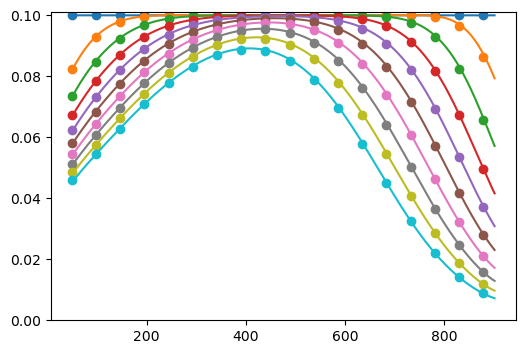

In [9]:
fig, axs = plt.subplots(figsize=(6,4))
nA = 1000
lAc = []
lTimes = []
cmp=3
#for i in range(0,len(G)-11,1):
strt = 1
major_stride = 12
minor_stride = 1
npts = 6
for i in range(nA):
    #Gt.append(G[i:11+i])
    X0 = np.array(G[strt+i*major_stride  :strt+i*major_stride+npts*minor_stride  :minor_stride]).T
    X1 = np.array(G[strt+i*major_stride+minor_stride  :strt+i*major_stride+npts*minor_stride+minor_stride  :minor_stride]).T
    #print(X0.shape,X1.shape)
    X  = np.concatenate((X1,X0),axis=0)
    Y  = np.array(G[strt+i*major_stride+2*minor_stride:strt+i*major_stride+npts*minor_stride+2*minor_stride:minor_stride]).T-\
        np.array(G[strt+i*major_stride+minor_stride:strt+i*major_stride+npts*minor_stride+minor_stride:minor_stride]).T
    u,s,v = svd(X,full_matrices=False)
    sinv = 1./s[0:cmp]
    #A = Y@v.T@np.diag(sinv)@u.T
    Ac = Y@v.T[:,0:cmp]@np.diag(sinv)@u.T[0:cmp,:]
    lAc.append(Ac)
    lTimes.append(ts[strt+i*major_stride+2*minor_stride])
print(lTimes[0])
Tstart=Tsnaps[0].T[100:1848]
c0=c1=decompose_field(x[100:1848],Tstart*1e-9)
print(c0)
Tappx = interp_temp(scale(x[100:1848]),c0)
print(Tappx)
#plt.plot(x[100:1848] * 1e6,Tappx)
#print(c)
nepoch=10
time_slice =np.linspace(100,5000,nepoch,dtype=int)
H = np.array([1,0.,1,0.,1,0.,1,0.,1,0.,1,0.,1],dtype=float).reshape((13,1))
n = 2
spread = H/np.array([1,1,2,1,3,1,4,1,5,1,6,1,7],dtype=float).reshape((13,1))**n
Hp = spread/sum(spread)
#Hp = np.array([1,0,0,0,0,0,0,0,0,0,0,0,0],dtype=float).reshape((13,1))
print(Hp)
i=0
Tavg_0 = 0.1
t_0 = 0.

colormap = plt.get_cmap('tab10', nepoch)
colors = [colormap(k) for k in range(nepoch)]
for t, Ts,col in zip(ts[time_slice],Tsnaps[time_slice],colors):#[0:1]:
    Tavg = np.dot(H.T,decompose_field(x[100:1848],Ts.T[100:1848]*1e-9))
    while lTimes[i]<t:
        '''if i<7:
            print(lAc[i])
        else:
            break'''
        
        dc = lAc[i]@np.concatenate((c1,c0),axis=0)
        c2=c1+12*dc
        c0=c1
        #print(c2)
        Hf = np.dot(H.T,c2)
        norm = np.sqrt(np.dot(c2.T,c2)[0,0])
        #print(norm)
        y = (Tavg-Tavg_0)*(lTimes[i]-t_0)/(t-t_0)+Tavg_0
        #print(Hf,y,Hp.shape,c2.shape)
        if False and i%10==0:
            print(c2.T)
        #print(y,Hf,Hp*(y-Hf))
        '''if i==1:
            break'''
        Hp = c2/norm
        #print(Hp)
        #c2+=Hp*(y-Hf)
        c1=c2
        if False and i%100==0:
            #print(c2.T)
            print(np.dot(H.T,c2),y)
        #print(Ac)
        #print(c)
        i+=1
    print(i)
    plt.plot(x[100:1848] * 1e6,interp_temp(scale(x[100:1848]),c2),color=col)
    plt.plot(x[100:1848] * 1e6,Ts.T[100:1848]*1e-9,'o',color=col,markevery=100)
    Tavg_0 = Tavg
    t_0 = t
    #break
plt.ylim(0.0,0.101)
plt.show()



IndexError: list index out of range

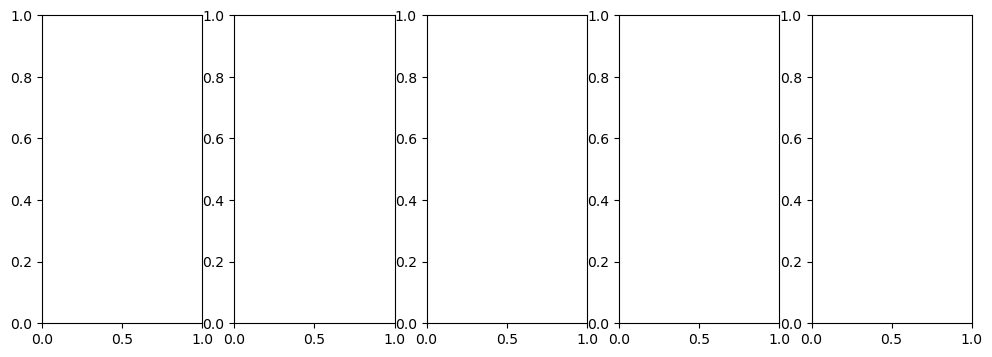

In [10]:
fig, axs = plt.subplots(1,5,figsize=(12,4))
#fig, ax = plt.subplots(figsize=(12,4))
for j,ax in enumerate(axs):#[0,:]):
    im = ax.imshow(Gt[j], cmap='tab20', vmin=-.2,vmax=.2,
           origin='upper', interpolation='nearest', aspect='equal')
'''for j,ax in enumerate(axs[1,:]):
    im = ax.imshow(Gt[j+5], cmap='tab20', vmin=-5.,vmax=2.,
               origin='upper', interpolation='nearest', aspect='equal')'''
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
#plt.title(f'Green\'s Function after {Nt} steps')
#plt.xlabel('x (m)')
#plt.ylabel('y (m)')
plt.tight_layout()
#plt.savefig('matrix_evolution.png')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os

def create_gif_from_matrices(matrices, output_gif, fps=30, figsize=(6,6)):
    """
    Create an animated GIF from a list of 2D NumPy matrices.

    Parameters:
    ----------
    matrices : list of np.ndarray
        List of 2D arrays to animate.
    output_gif : str
        Path to output GIF file.
    fps : int
        Frames per second in the GIF.
    figsize : tuple
        Size of the figure.
    """
    # Temporary directory to store the images
    temp_dir = "temp_images"
    os.makedirs(temp_dir, exist_ok=True)
    
    # Create frames from the matrices
    for i, matrix in enumerate(matrices):
        fig, ax = plt.subplots(figsize=figsize)
        im = ax.imshow(matrix, cmap='viridis', interpolation='nearest')
        ax.set_xticks([])
        ax.set_yticks([])
        plt.close(fig)

        # Save each frame as an image
        frame_path = os.path.join(temp_dir, f"frame_{i:04d}.png")
        fig.savefig(frame_path, dpi=150)
        plt.close(fig)
    
    # Create GIF using imageio
    with imageio.get_writer(output_gif, mode='I', duration=1/fps) as writer:
        for i in range(len(matrices)):
            frame_path = os.path.join(temp_dir, f"frame_{i:04d}.png")
            image = imageio.imread(frame_path)
            writer.append_data(image)

    # Clean up temporary images
    for i in range(len(matrices)):
        os.remove(os.path.join(temp_dir, f"frame_{i:04d}.png"))
    os.rmdir(temp_dir)

    print(f"GIF saved to {output_gif}")

#create_gif_from_matrices(Gt, "animation.gif", fps=20)
